In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key.
from config import weather_api_key
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

illoqqortoormiut gl
attawapiskat ca
maldonado uy
castro cl
longyearbyen sj
qaanaaq gl
kaitangata nz
mahebourg mu
punta arenas cl
georgetown gy
ushuaia ar
belushya guba ru
saskylakh ru
katakwi ug
nizhneyansk ru
atuona pf
nikolskoye ru
perez ph
rikitea pf
alexandria eg
mataura pf
tornio fi
port hardy ca
chokurdakh ru
nouadhibou mr
petropavlovsk-kamchatskiy ru
hermanus za
ushuaia ar
avarua ck
south venice us
klaksvik fo
la orilla mx
toliary mg
aykhal ru
yellowknife ca
saint-philippe re
busselton au
ushuaia ar
bambous virieux mu
arraial do cabo br
ushuaia ar
tiznit ma
atuona pf
gravdal no
bengkulu id
port hardy ca
pevek ru
kuusamo fi
qaanaaq gl
rikitea pf
santa cruz cr
bonoua ci
qaanaaq gl
geraldton au
georgetown sh
punta arenas cl
jamestown sh
bonavista ca
atuona pf
sitka us
upernavik gl
vaini to
ilulissat gl
san pedro bo
hilo us
concepcion del uruguay ar
warqla dz
cape town za
chimbote pe
vestmannaeyjar is
port hedland au
hobart au
manakara mg
ribeira grande pt
nikolskoye ru
punta arenas

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | maldonado
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | katakwi
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | perez
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | 

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maldonado,-34.67,-54.92,52.00,71,75,16.11,UY,2020-07-07 19:59:52
1,Castro,-24.79,-50.01,65.79,74,50,8.70,BR,2020-07-07 19:59:45
2,Longyearbyen,78.22,15.64,44.60,81,75,28.86,SJ,2020-07-07 19:57:11
3,Qaanaaq,77.48,-69.36,47.64,54,0,1.12,GL,2020-07-07 19:59:30
4,Kaitangata,-46.28,169.85,39.99,77,79,8.99,NZ,2020-07-07 19:59:52
5,Mahebourg,-20.41,57.70,71.60,94,75,8.05,MU,2020-07-07 19:58:17
6,Punta Arenas,-53.15,-70.92,33.80,80,75,12.75,CL,2020-07-07 19:59:12
7,Georgetown,5.41,100.34,77.00,100,40,4.70,MY,2020-07-07 19:56:13
8,Ushuaia,-54.80,-68.30,41.00,56,40,13.87,AR,2020-07-07 19:56:37
9,Saskylakh,71.92,114.08,47.93,75,83,7.54,RU,2020-07-07 19:57:24


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maldonado,UY,2020-07-07 19:59:52,-34.67,-54.92,52.00,71,75,16.11
1,Castro,BR,2020-07-07 19:59:45,-24.79,-50.01,65.79,74,50,8.70
2,Longyearbyen,SJ,2020-07-07 19:57:11,78.22,15.64,44.60,81,75,28.86
3,Qaanaaq,GL,2020-07-07 19:59:30,77.48,-69.36,47.64,54,0,1.12
4,Kaitangata,NZ,2020-07-07 19:59:52,-46.28,169.85,39.99,77,79,8.99
...,...,...,...,...,...,...,...,...,...
552,Belfort,FR,2020-07-07 19:57:37,47.63,6.87,66.99,63,70,2.24
553,Mumbwa,ZM,2020-07-07 20:02:30,-14.98,27.06,56.43,54,0,6.15
554,Hailar,CN,2020-07-07 20:02:30,49.20,119.70,56.16,46,35,6.78
555,Taoudenni,ML,2020-07-07 20:02:31,22.68,-3.98,104.83,8,0,8.70


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594152151.484145

In [27]:
today = time.strftime("%x")
today 

'07/07/20'

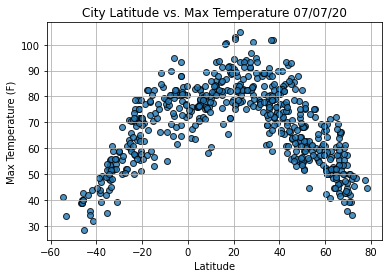

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()